# Python Web Scraping and EDA Project

## Import libraries

In [6]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

## Initialize empty book records list

In [11]:
book_records = []

## Scrape book information for all 50 pages

In [12]:
for page in range(1, 51):
    url = 'https://books.toscrape.com/catalogue/page-{}.html'.format(page)
    page_response = requests.get(url)
    page_soup = BeautifulSoup(page_response.content, 'html.parser')

    books = page_soup.find_all('h3')

    for book in books:
        book_url = book.find('a')['href']
        book_response = requests.get('https://books.toscrape.com/catalogue/' + book_url)
        book_soup = BeautifulSoup(book_response.content, "html.parser")

        book_title = book_soup.find('h1').text
        book_category = book_soup.find('ul', class_="breadcrumb").find_all('a')[2].text.strip()
        book_rating = book_soup.find('p', class_='star-rating')['class'][1]
        book_price = book_soup.find('p', class_='price_color').text.strip()
        book_availability = book_soup.find('p', class_='availability').text.strip()

        book_records.append([book_title, book_category, book_rating, book_price, book_availability])

: 

## Create dataframe from book records and save to CSV

In [ ]:
# Create a DataFrame from the collected book records
df = pd.DataFrame(book_records, columns=["Title", "Category", "Rating", "Price", "Availability"])

# Save the DataFrame to a CSV file
df.to_csv("book_records.csv", index=False)

# Transform data frame

In [20]:
df = pd.read_csv("book_records.csv")

df['Price'] = df['Price'].str.extract('£([\d.]+)').astype(float)

# Extract the numeric part from the 'Availability' column
df['Availability'] = df['Availability'].str.extract('(\d+)').astype(int)

# EDA

## Import libraries

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

## Summary statistics

In [22]:
print(df.describe())

            Price  Availability
count  1000.00000   1000.000000
mean     35.07035      8.585000
std      14.44669      5.654622
min      10.00000      1.000000
25%      22.10750      3.000000
50%      35.98000      7.000000
75%      47.45750     14.000000
max      59.99000     22.000000


## Unique categories

In [23]:
print("Unique Categories:", df["Category"].unique())

Unique Categories: ['Poetry' 'Historical Fiction' 'Fiction' 'Mystery' 'History' 'Young Adult'
 'Business' 'Default' 'Sequential Art' 'Music' 'Science Fiction'
 'Politics' 'Travel' 'Thriller' 'Food and Drink' 'Romance' 'Childrens'
 'Nonfiction' 'Art' 'Spirituality' 'Philosophy' 'New Adult' 'Contemporary'
 'Fantasy' 'Add a comment' 'Science' 'Health' 'Horror' 'Self Help'
 'Religion' 'Christian' 'Crime' 'Autobiography' 'Christian Fiction'
 'Biography' 'Womens Fiction' 'Erotica' 'Cultural' 'Psychology' 'Humor'
 'Historical' 'Novels' 'Short Stories' 'Suspense' 'Classics' 'Academic'
 'Sports and Games' 'Adult Fiction' 'Parenting' 'Paranormal']


## Ratings distribution

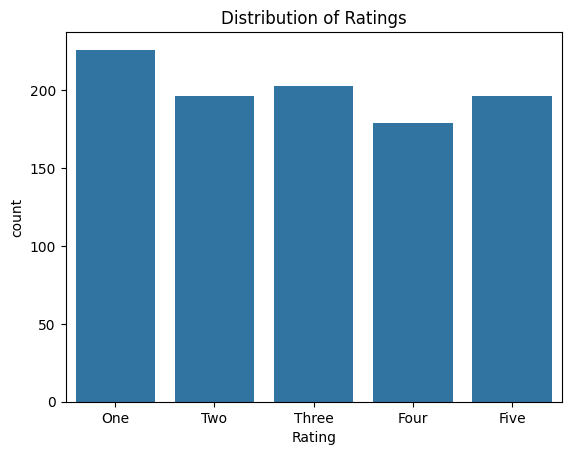

In [24]:
sns.countplot(x="Rating", data=df, order=["One", "Two", "Three", "Four", "Five"])
plt.title("Distribution of Ratings")
plt.show()

## Availability distribution

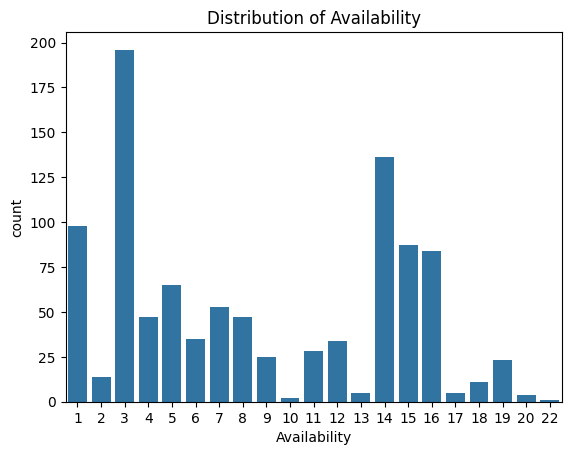

In [25]:
sns.countplot(x="Availability", data=df)
plt.title("Distribution of Availability")
plt.show()

## Price boxplots for each category

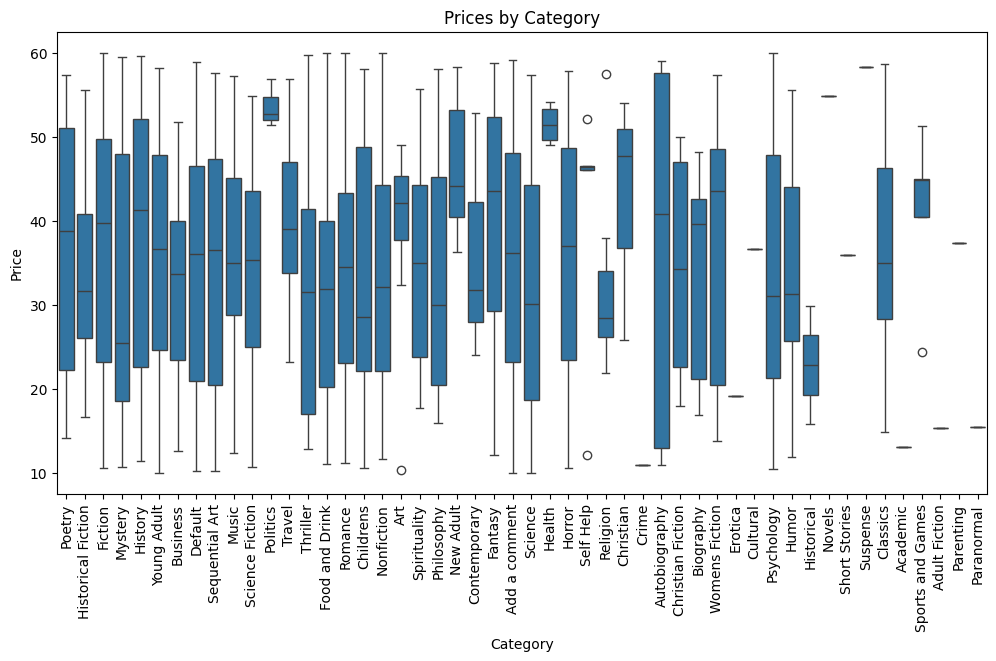

In [26]:
# Boxplot for Prices by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x="Category", y="Price", data=df)
plt.title("Prices by Category")
plt.xticks(rotation=90)
plt.show()

## Average price by category

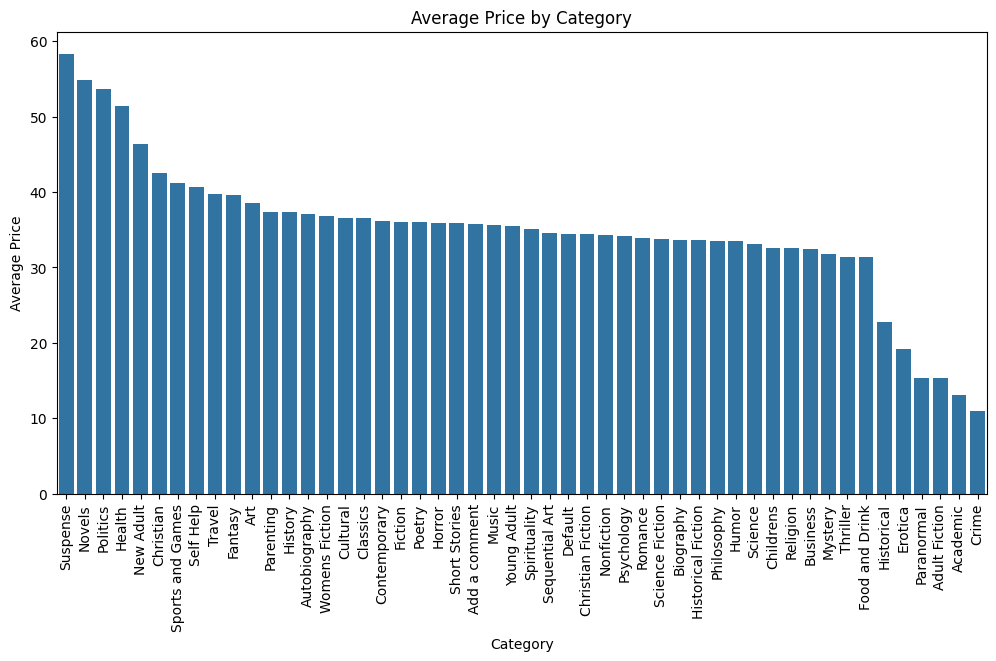

In [28]:
# Average price by category
avg_price_by_category = df.groupby("Category")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values)
plt.title("Average Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

## Count of books in each category

C:\Users\User\AppData\Local\Temp\ipykernel_17688\859439741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category", data=df, palette="viridis")


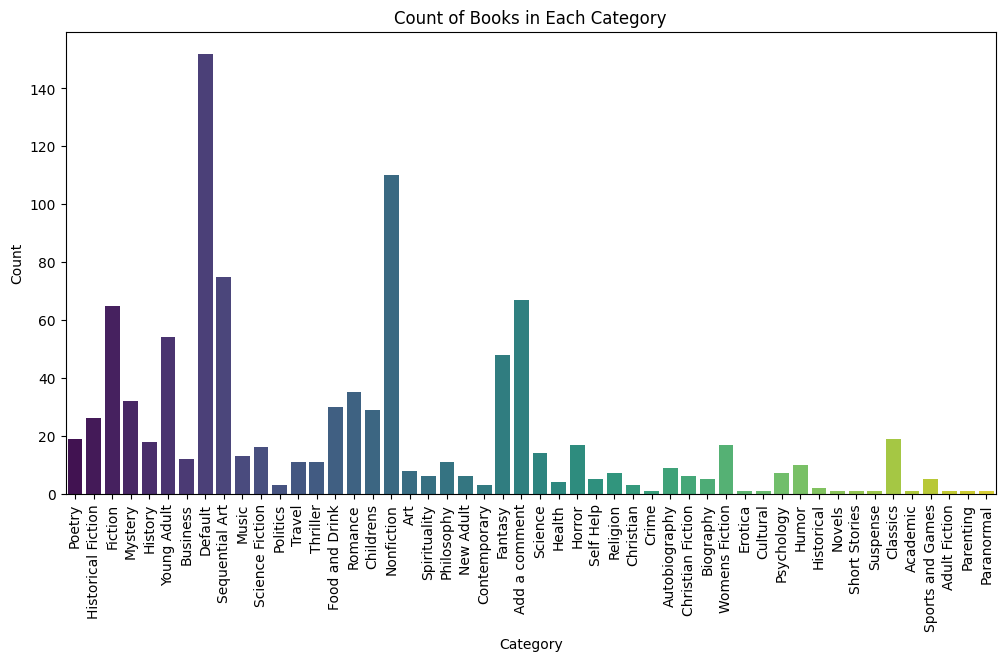

In [29]:
# Count of books in each category
plt.figure(figsize=(12, 6))
sns.countplot(x="Category", data=df, palette="viridis")
plt.title("Count of Books in Each Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

## Average price by rating

C:\Users\User\AppData\Local\Temp\ipykernel_17688\3249020044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_rating.index, y=avg_price_by_rating.values, palette="coolwarm")


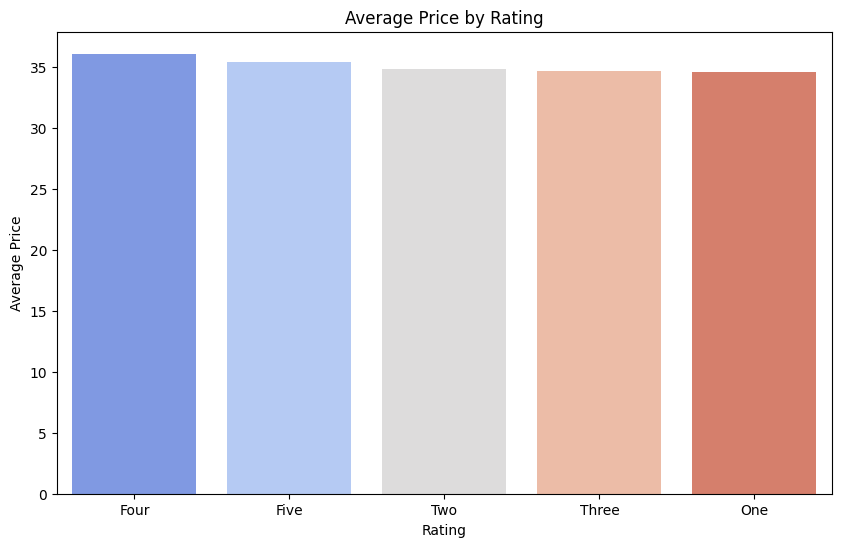

In [30]:
# Average price by rating
avg_price_by_rating = df.groupby("Rating")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_rating.index, y=avg_price_by_rating.values, palette="coolwarm")
plt.title("Average Price by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Price")
plt.show()